In [1]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt

The code loads a pre-trained ResNet-18 model for image classification, configures its last layer into 10 classes, loads stored weights, prepares transforms for images, and loads and puts the pre-trained text processing model into evaluation mode.

In [2]:
vision_weights_path = "./vision/trained_model_vision/resnet18_weights.pth"
save_directory = "./trans/trained_model_trans"

vision_model = models.resnet18(pretrained=False)
num_ftrs = vision_model.fc.in_features
vision_model.fc = nn.Linear(num_ftrs, 10) 
vision_model.load_state_dict(torch.load(vision_weights_path, map_location=torch.device('cpu')))
vision_model.eval()

image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

tokenizer = AutoTokenizer.from_pretrained(save_directory)
text_model = AutoModelForSequenceClassification.from_pretrained(save_directory)
text_model.eval()

c:\Users\Валерия\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Валерия\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


Takes a textual description and an image path, predicts their classes using the textual and visual model, compares the results, and then displays the image with a header indicating whether the predictions match

In [3]:
def predict_and_display(text: str, image_path: str):
    text_inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        text_outputs = text_model(**text_inputs)
    text_pred = torch.argmax(text_outputs.logits, dim=1).item()

    image = Image.open(image_path).convert("RGB")
    image_tensor = image_transforms(image)
    image_tensor = image_tensor.unsqueeze(0)
    with torch.no_grad():
        vision_outputs = vision_model(image_tensor)
    vision_pred = torch.argmax(vision_outputs, dim=1).item()

    match = (text_pred == vision_pred)

    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"{text}\n It's: {match}", fontsize=12)
    plt.axis("off")
    plt.show()

    return text_pred, vision_pred, match

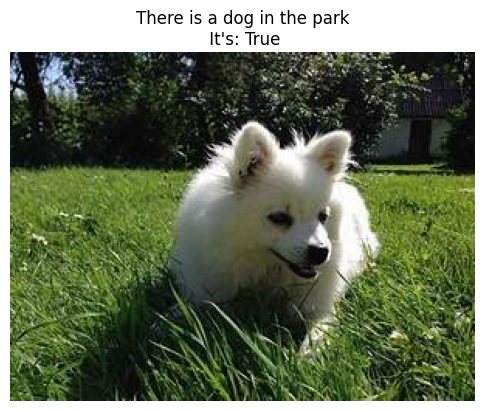

(4, 4, True)

In [5]:
# To be used only for Butterfly, Cat, Chicken, Cow, Dog, Elephant, Horse, Sheep, Spider, Squirrel.

text_input = "There is a dog in the park"
image_input = "./example_img/OIP-_3acmW_iSr12XgQTNz0IdQHaFj.jpeg"  
predict_and_display(text_input, image_input)